# Mission 1 Analyse en composantes principales

Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :

analyse de l'éboulis des valeurs propres ;
représentation des variables par le cercle des corrélations ;
représentation des individus par les plans factoriels ;
analyser de la qualité de représentation et la contribution des individus.
Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#import matplotlib.cm as cm
#import seaborn as sns
#import time

from P6_Functions import *
#from sklearn.preprocessing import StandardScaler

#from sklearn import metrics
#from scipy.stats import loguniform
#from sklearn.cluster import KMeans
#from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import silhouette_samples, silhouette_score, plot_confusion_matrix
#from sklearn.pipeline import make_pipeline

from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#4cb2ff', '#61ba86'])

In [5]:
df = pd.read_csv('datas/example.csv' , header=0, sep=",", decimal=".")
df

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


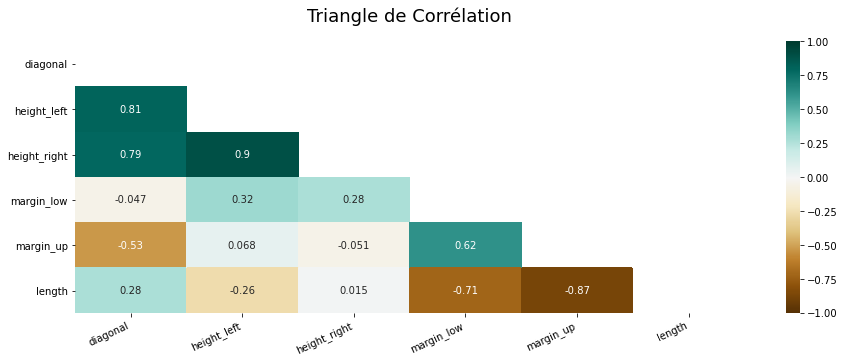

In [6]:
heatmap_corr(df)
plt.savefig("graphiques/04. Triangle de corrélation.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)

# L'ACP
L'ACP
En fait, l’ACP est une méthode bien connue de réduction de dimension qui va permettre de transformer des variables très corrélées en nouvelles variables décorrélées les unes des autres.

Le principe est simple : Il s’agit en fait de résumer l’information qui est contenue dans une large base de données en un certain nombre de variables synthétiques appelées : Composantes principales.

L’idée est de pouvoir projeter ces données sur l’hyperplan le plus proche afin d’avoir une représentation simple de nos données. Évidemment, qui dit réduction de dimension dit perte d’informations. C’est là tout l’enjeu que représente une Analyse en Composantes principales. Il faut pouvoir réduire la dimension de nos données tout en conservant un maximum d’informations.

L'analyse en composantes principales va nous permettre de réduire nos 6 variables quantitatives à 2. On pourra alors représenter chaque billet dans un espace à 2 dimensions. Ce qui permettra de vérifier où se situent les vrais et faux billets dans l'espace, et s'ils forment des clusters distincts. L'ACP étant sensible à la variance, on va d'abord standardiser les variables quantitatives.

Standardisation des variables
Il est important de centrer et réduire nos variables pour atténuer l’effet d’échelle car elles ne sont pas calculées sur la même base. 

Même si toutes les variables s'expriment en millimètres, leur échelle varie. Ici les marges avoisinnent 4mm alors que les longueurs dépassent 170mm. Pour que les valeurs comme celles de la longueur n'aient pas trop de poids face aux autres, il faut que toutes nos variables s'expriment dans la même unité.\
Standardiser les variables consiste à les centrer autour de 0, puis réduire à 1 leur écart type (standard deviation en anglais, d'où le terme standardisation). Le centrage ne change pas la forme d'une distribution, il ne fait que la déplacer.

Pour que la moyenne de chaque variable soit égale à 0, on soustrait à toutes les observations la moyenne de la variable concernée.



## Preprocessing

In [7]:
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [8]:
#Préparation du jeu de données pour l'ACP
# select columns for CPA
#Préparation du jeu de données pour l'ACP
df_pca = df.copy()
df_pca.index = df_pca['id']
del df_pca['id']


#Transformation des données en array Numpy
X = df_pca.values
names = df_pca.index # ou data['columns'] pour avoir les intitulés
features=df_pca.columns
#centering but no reduction because the data already has the same unit
std_scale = sk.preprocessing.StandardScaler().fit(X) # Fit des valeurs sur le modèle
X_scaled= std_scale.transform(X)
#X_scaled = pd.DataFrame(X_scaled, columns=df_pca.columns) # Valeurs standardisées
X_scaled


array([[-0.66422777, -0.50222407, -1.22890038,  0.43822393,  0.48568108,
        -1.12401394],
       [-0.28760378, -0.0507867 ,  0.44945894,  1.4937023 ,  0.56401673,
        -0.28910336],
       [ 0.15749731,  1.10602155,  0.90460723,  0.14429325,  1.19070199,
        -0.93709366],
       [ 1.83518602,  1.02137704,  1.04684107, -0.59053347, -1.62938167,
         1.09410669],
       [-1.04085177, -1.57438781, -1.17200685, -1.48568601, -0.61101813,
         1.25610427]])

Les variables maintenant standardisées ont toutes le même écart type, proche de 1.

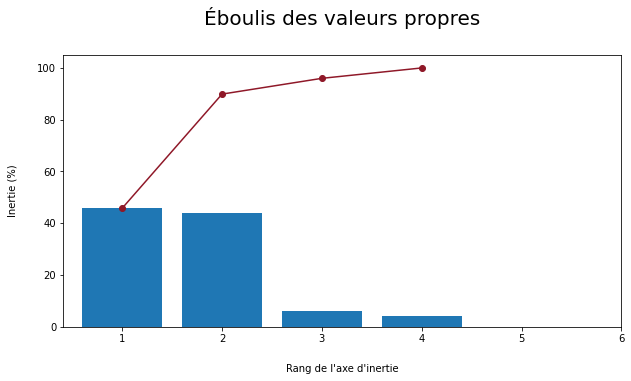

 Variance par composante : [45.82129599 44.07044993  6.09406586  4.01418822]
Variance expliquée : [ 45.82129599  89.89174592  95.98581178 100.        ]


<Figure size 432x288 with 0 Axes>

In [9]:
#choice of the number of components to calculate
n_comp = 4
#calculation of the main components
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
display_scree_plot(pca)
plt.savefig("graphiques/05.Screeplot.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)

#proportion de variance expliquée 
#Le paramètre pca.explained_variance_ratio_ renvoie un vecteur de la variance expliquée par chaque dimension.
valprop_ratio = pca.explained_variance_ratio_*100  
print( ' Variance par composante :' ,valprop_ratio)  
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print( 'Variance expliquée :', valprop_ratio.cumsum())


La méthode du coude précise une représentation satisfaisante de nos variables sur les deux premières composantes principales, le premier axe factoriel.\
Chaque composante stocke un certain pourcentage de l'information contenu dans les données, qu'on nomme variance expliquée. La 1ère composante sera celle qui stocke le plus d'informations, donc le plus de variance expliquée dans son vecteur.

69.4% de la variance des données est expliquée par les deux premières composantes. 


## Cercle des corrélations et projection des individus

<Figure size 1440x1440 with 0 Axes>

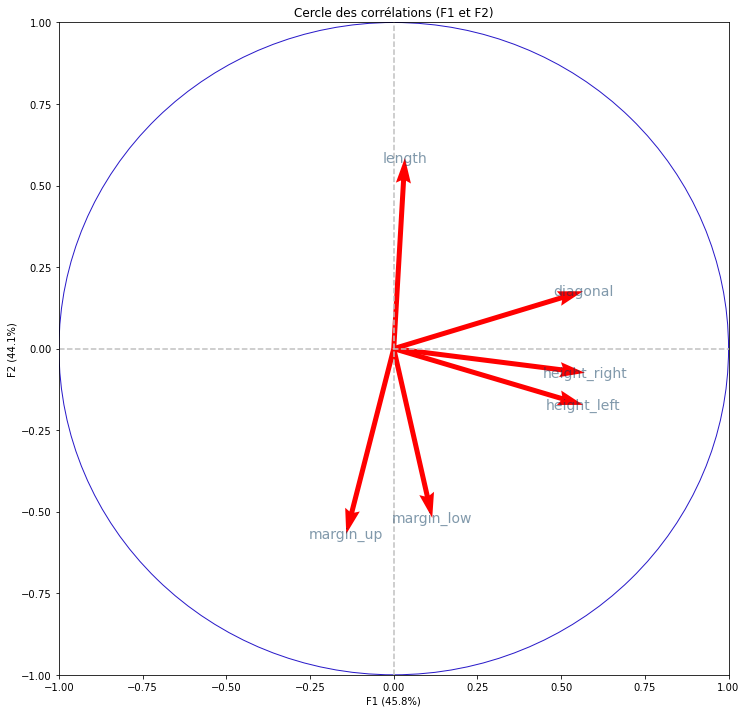

<Figure size 432x288 with 0 Axes>

In [10]:
#circles of correlations
pcs = pca.components_

#projection
X_projected = pca.transform(X_scaled)

#figure initialization
plt.figure(figsize=(20,20))
    
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

#plt.tight_layout(pad=4)
plt.savefig("graphiques/06. Cercle des corrélations.jpg")
plt.show()

Le cercle des corrélations confirme que les dépendances entre variables ont bien été conservées après projection. Pour chaque variable, la longueur de la flèche est proportionnelle à la quantité d'informations stockée par les composantes.

A partir de cette représentation graphique, nous pouvons déterminer les variables qui se révélent être les plus corrélées aux composantes F1 et F2. Notons également que la longueur des flèches est importante, une variable dont la longueur de la flèche est proche de 1 sera extrêmement bien représentée...

La corrélation entre 2 variables se déduit par l'angle que forme leurs flèches :

0° : corrélation positive\
90° : absence de corrélation\
180° : corrélation négative\
Les corrélations entre les 6 variables de départ ont bien été conservées après réduction en 2 dimensions. Ici, les hauteurs gauche et droite sont bien corrélées positivement,\ tout comme les 2 marges. L'ACP a conservé suffisamment de données pour que la représentation sur le plan factoriel soit fiable.


F1 : Longueur du billet VS hauteur / marge\
F2 : Longueur , la diagonale

Je n'ai conservé que cette projection car elle est de loin la plus pertinente.

On voit que l'axe de la première composante est celui qui sépare principalement les vrais billets des faux billets. De plus, F1 explique 47% de l'inertie.

Le second axe explique 22% de l'inertie et participe à la séparation des vrais billets et des faux billets.
On voit qu'une diagonale sépare clairement les vrais et les faux billets.
F1 permet dans de nombreux cas de déterminer s'il s'agit d'un vrai billet ou non. Pour les valeurs proches de zéro, alors c'est la valeur de F2 qui va permettre de discriminer.

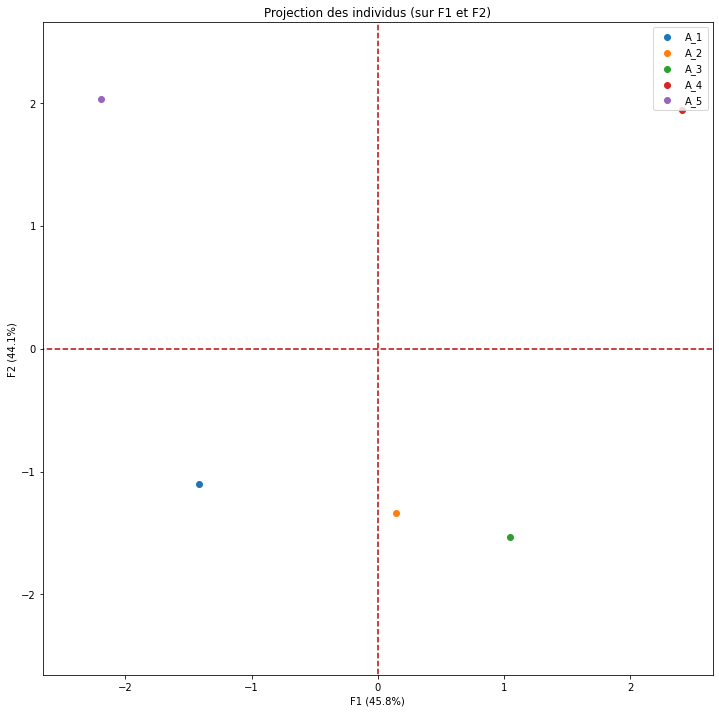

<Figure size 432x288 with 0 Axes>

In [10]:
#Coordonnées factorielles 
X_projected = pca.transform(X_scaled)

#figure initialization
display_factorial_planes(X_projected, 2, pca, [(0,1)], illustrative_var = names) 
plt.tight_layout(pad=4)
plt.savefig("graphiques/07. projection des individus.jpg")

plt.show()

In [21]:
#Coefficients de la composante principale F1
F1 = pca.components_[0]
print(F1) 
#Coefficients de la composante principale F2
F2 = pca.components_[1]
print(F2)

[ 0.07327499  0.47550205  0.4918214   0.43102671  0.35253984 -0.46537288]
[ 0.77963908  0.33925019  0.23554253 -0.32053699 -0.14111974  0.31453645]


In [22]:
#Calcul des composantes principales
#Ici seulement F1 et F2 seront utiles à l'interprétation attendue

df_facto = pd.DataFrame(X_projected, index=df.index, columns=["F" + str(i+1) for i in range(6)]).iloc[:, :2]
df_facto


,F1,F2
0,2.153639,1.599709
1,-2.110416,-0.526039
2,-1.973152,-0.048102
3,-2.059795,-0.089105
4,-2.403180,0.412170
...,...,...
165,2.478626,0.189974
166,2.585331,2.914472
167,2.067245,0.845602
168,0.739257,-0.972965


## Contribution des individus dans l'inertie totale:

In [23]:
#Contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame({'c_inertie':di, 'is_genuine':df_pca.index})
ctr_indiv_inertie

,c_inertie,is_genuine
0,18.410598,True
1,5.444799,True
2,4.960527,True
3,4.805719,True
4,18.039567,True
...,...,...
165,7.673233,False
166,20.625650,False
167,8.567410,False
168,3.482926,False


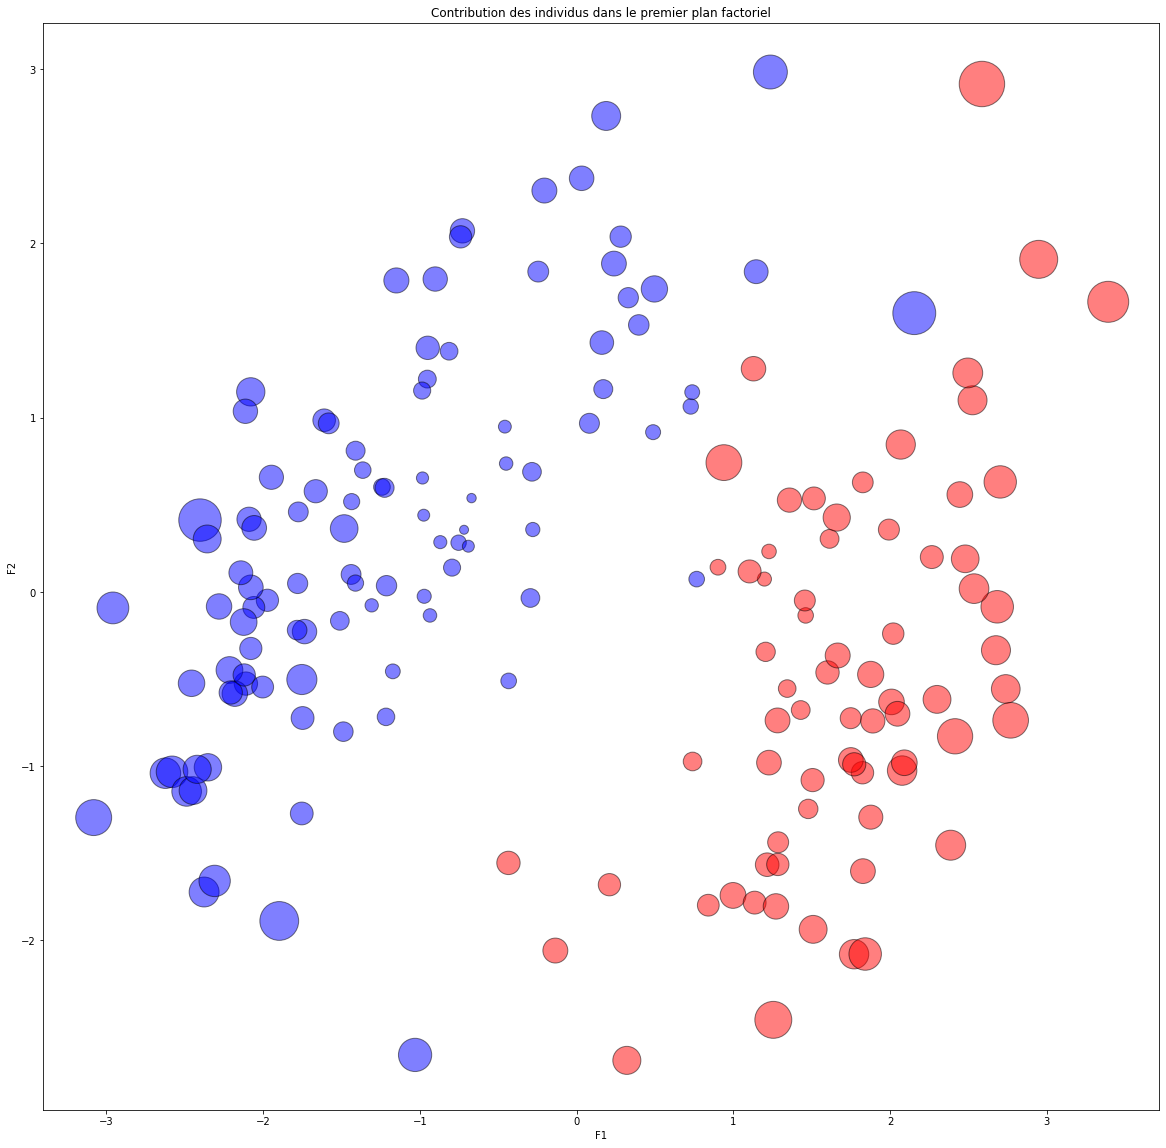

In [24]:
#Scatter Plot de la contribution des individus dans l'inertie totale
#figure initialization
plt.figure(figsize=(20,20))
    
    
colors = ['red', 'blue']
plt.scatter(df_facto['F1'], df_facto['F2'], c=df['is_genuine'].apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1,
            s=ctr_indiv_inertie['c_inertie']*100)

plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Contribution des individus dans le premier plan factoriel')

plt.savefig('graphiques/08. contribution_inertie.jpg.png')
plt.show()

## Qualité de réprésentation des individus (COS2):


In [25]:
#Qualité de représentation des individus - COS2
cos2 = X_projected**2
n_comp = 2

for j in range(n_comp):
    cos2[:,j] = cos2[:,j]/di
    
cos2_indiv = pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'is_genuine': df['is_genuine']})
cos2_indiv

,COS2_1,COS2_2,is_genuine
0,0.251929,0.139000,True
1,0.818002,0.050822,True
2,0.784862,0.000466,True
3,0.882856,0.001652,True
4,0.320145,0.009417,True
...,...,...,...
165,0.800651,0.004703,False
166,0.324059,0.411824,False
167,0.498809,0.083461,False
168,0.156908,0.271800,False


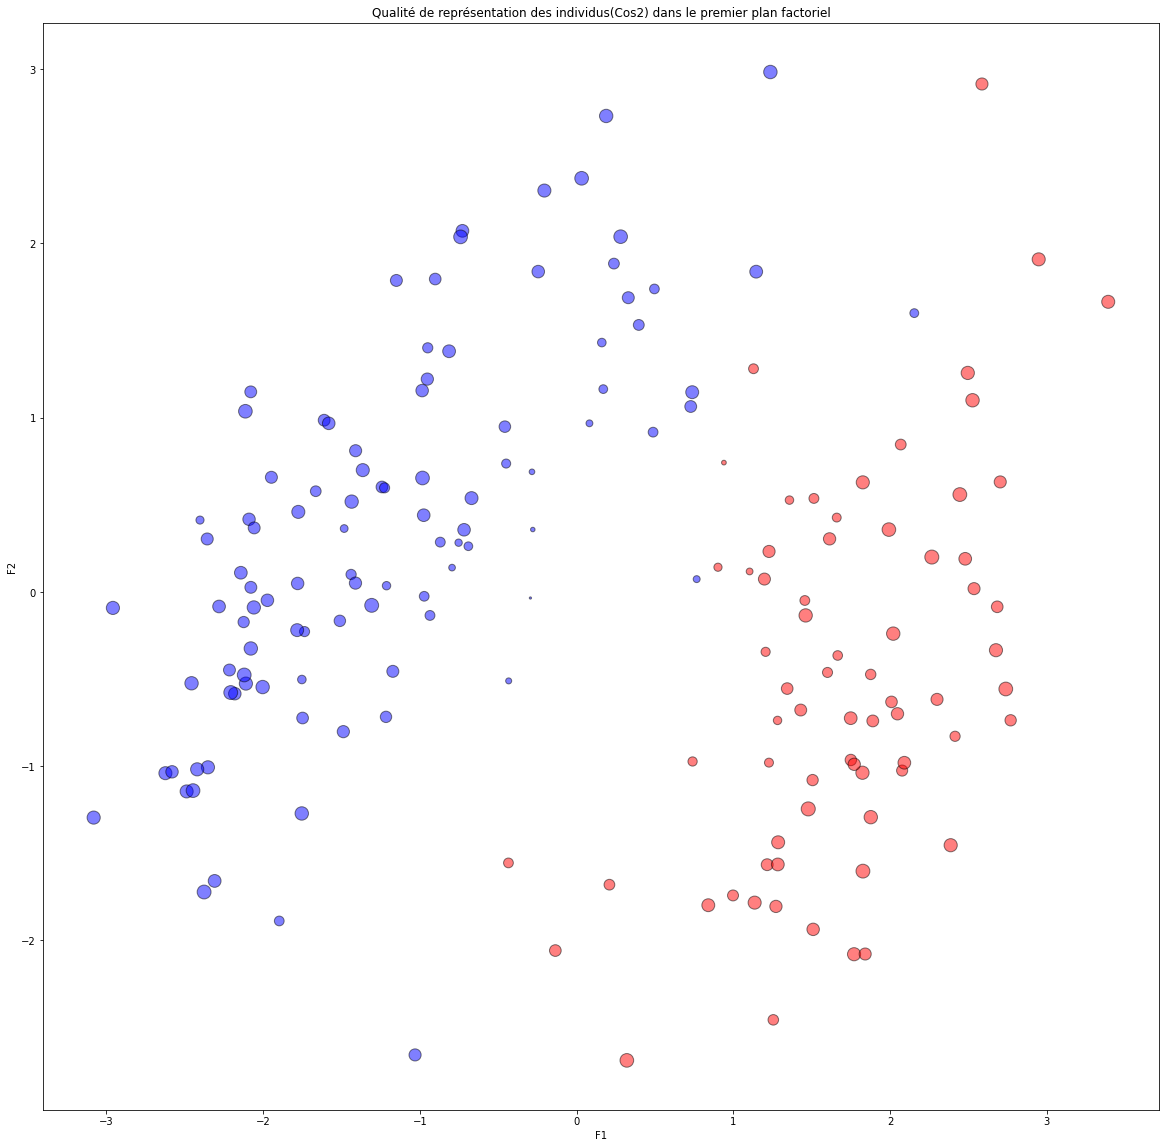

In [26]:
#Scatter Plot de la qualité de représentation des individus dans le 1er plan factoriel
#figure initialization
plt.figure(figsize=(20,20))
    
    
cos2_indiv['COS2_1 + COS2_2'] = cos2_indiv['COS2_1'] + cos2_indiv['COS2_2']
colors = ['red', 'blue']
plt.scatter(df_facto['F1'], df_facto['F2'], c=df['is_genuine'].apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1,
            s=cos2_indiv['COS2_1 + COS2_2']*200)

plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Qualité de représentation des individus(Cos2) dans le premier plan factoriel')

plt.savefig('graphiques/09. qualite_representationcos2.png')
plt.show()